In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

from keras.layers import Dense, Input
from keras import Sequential
from keras.losses import MeanSquaredError, BinaryCrossentropy
from keras.activations import sigmoid
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")


In [2]:
#load the dataset
df = pd.read_csv("data.csv")

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
#check null values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

- There is no null value in the dataset

In [7]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

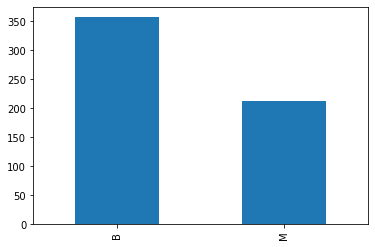

In [8]:
df['diagnosis'].value_counts().plot.bar()
plt.show()

In [9]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [10]:
df.drop('id', axis=1, inplace=True)

In [11]:
df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [12]:
X = df.drop('diagnosis',1)
y = df['diagnosis']

In [13]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

In [15]:
sc = StandardScaler()
X = sc.fit_transform(X_train)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
# Initializing the ANN
classifier = Sequential()
#adding the input layer and first hidden layer
classifier.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu',input_dim=30))

#adding the second hidden layer
classifier.add(Dense(units=9,kernel_initializer='glorot_uniform',activation='relu'))

#adding the output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

#compiling the ann
classifier.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 279       
                                                                 
 dense_1 (Dense)             (None, 9)                 90        
                                                                 
 dense_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


In [17]:
classifier.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
15/15 [==============================] - 3s 4ms/step - loss: 0.6964 - accuracy: 0.5165
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5496 - accuracy: 0.7385
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.4541 - accuracy: 0.8505
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.3862 - accuracy: 0.8769
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.3333 - accuracy: 0.8989
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.2891 - accuracy: 0.9165
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.2522 - accuracy: 0.9407
Epoch 8/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2220 - accuracy: 0.9495
Epoch 9/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1966 - accuracy: 0.9516
Epoch 10/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1752 - accuracy: 0.9582
Epoch 11/

15/15 [==============================] - 0s 4ms/step - loss: 0.0332 - accuracy: 0.9934
Epoch 84/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0328 - accuracy: 0.9934
Epoch 85/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0321 - accuracy: 0.9934
Epoch 86/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0320 - accuracy: 0.9934
Epoch 87/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0321 - accuracy: 0.9934
Epoch 88/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0316 - accuracy: 0.9934
Epoch 89/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0309 - accuracy: 0.9934
Epoch 90/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0303 - accuracy: 0.9934
Epoch 91/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0299 - accuracy: 0.9934
Epoch 92/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0295 - accuracy: 0.9934
Epoch 93/100


In [28]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred_test > 0.5)

4/4 [==============================] - 0s 3ms/step


In [29]:
test_accuracy = accuracy_score(y_test,y_pred)
print("Test accuracy is: ",round(test_accuracy*100,2),'%')
confusion_matrix(y_test,y_pred)

Test accuracy is:  97.37 %


array([[65,  2],
       [ 1, 46]], dtype=int64)

In [30]:
from sklearn.metrics import precision_score, f1_score, recall_score
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [31]:
print("Precision:",round(precision*100,2),"%")
print("Recall:",round(recall*100,2),"%")
print("F1 Score:",round(f1*100,2),"%")

Precision: 95.83 %
Recall: 97.87 %
F1 Score: 96.84 %


In [32]:
# Let's see the confusion metrics
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

True negatives:  65 
False positives:  2 
False negatives:  1 
True positives:  46


In [36]:
#Cross validate the model
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def built_classifier():
    classifier = Sequential()
    classifier.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu',input_dim=30))
    classifier.add(Dense(units=9,kernel_initializer='glorot_uniform',activation='relu'))
    classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
    classifier.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = built_classifier, batch_size = 32, epochs=100)
accuracies = cross_val_score(estimator = classifier, X=X_train, y=y_train, cv=5, n_jobs=-1)

In [37]:
accuracies

array([0.97802198, 0.97802198, 0.94505495, 1.        , 0.97802198])

In [39]:
mean = accuracies.mean()
mean

0.9758241772651672

In [40]:
history = classifier.fit(X_train,y_train,batch_size =32, epochs = 100, validation_data = (X_test,y_test))
history_dict =history.history
loss_values =history_dict['loss']
val_loss_values =history_dict['val_loss']
epochs =range(1,len(loss_values)+1)

Epoch 1/100
15/15 [==============================] - 4s 126ms/step - loss: 0.5988 - accuracy: 0.7846 - val_loss: 0.5511 - val_accuracy: 0.8509
Epoch 2/100
15/15 [==============================] - 0s 22ms/step - loss: 0.5286 - accuracy: 0.8725 - val_loss: 0.4878 - val_accuracy: 0.9035
Epoch 3/100
15/15 [==============================] - 0s 22ms/step - loss: 0.4680 - accuracy: 0.9077 - val_loss: 0.4323 - val_accuracy: 0.9123
Epoch 4/100
15/15 [==============================] - 0s 21ms/step - loss: 0.4141 - accuracy: 0.9341 - val_loss: 0.3804 - val_accuracy: 0.9035
Epoch 5/100
15/15 [==============================] - 0s 21ms/step - loss: 0.3635 - accuracy: 0.9407 - val_loss: 0.3352 - val_accuracy: 0.9035
Epoch 6/100
15/15 [==============================] - 0s 21ms/step - loss: 0.3176 - accuracy: 0.9473 - val_loss: 0.2965 - val_accuracy: 0.9035
Epoch 7/100
15/15 [==============================] - 0s 20ms/step - loss: 0.2768 - accuracy: 0.9516 - val_loss: 0.2619 - val_accuracy: 0.9123
Epoch

15/15 [==============================] - 0s 19ms/step - loss: 0.0467 - accuracy: 0.9890 - val_loss: 0.0931 - val_accuracy: 0.9386
Epoch 59/100
15/15 [==============================] - 0s 20ms/step - loss: 0.0460 - accuracy: 0.9890 - val_loss: 0.0922 - val_accuracy: 0.9386
Epoch 60/100
15/15 [==============================] - 0s 19ms/step - loss: 0.0454 - accuracy: 0.9890 - val_loss: 0.0910 - val_accuracy: 0.9474
Epoch 61/100
15/15 [==============================] - 0s 18ms/step - loss: 0.0451 - accuracy: 0.9868 - val_loss: 0.0900 - val_accuracy: 0.9474
Epoch 62/100
15/15 [==============================] - 0s 20ms/step - loss: 0.0448 - accuracy: 0.9868 - val_loss: 0.0891 - val_accuracy: 0.9474
Epoch 63/100
15/15 [==============================] - 0s 20ms/step - loss: 0.0440 - accuracy: 0.9868 - val_loss: 0.0879 - val_accuracy: 0.9474
Epoch 64/100
15/15 [==============================] - 0s 19ms/step - loss: 0.0434 - accuracy: 0.9868 - val_loss: 0.0870 - val_accuracy: 0.9474
Epoch 65/100

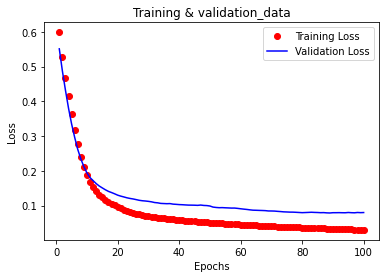

In [41]:
plt.plot(epochs,loss_values,'ro',label='Training Loss')
plt.plot (epochs,val_loss_values,'b',label ='Validation Loss')
plt.title ('Training & validation_data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()